# MLFlow

MLFlow Tracking is a tool to track experiments and results.

## MLFlow Tracking @ Jean Zay

MLFlow Tracking is available on Jean Zay through the jupyterhub platform.

### How to use MLFlow Tracking on Jean Zay

* You need first to run a jupyter lab session on Jean Zay. 
* From the sidebar, in software, you can load the environment you want to use. You'll need to have mlflow installed in this environment (`pythorch` env have it installed by default)
* Then, you can use the MLFlow Tracking UI by clicking on the MLFlow icon in the jupyter launcher.
* In the dialog box set the environment variable `MLFLOW_BACKEND_STORE_URI` to the path where you want to store the tracking data.

We set a common directory to `MLFLOW_BACKEND_STORE_URI=/gpfsscratch/rech/owt/commun/galaxy_classification/mlruns`.

Note: if the `MLFLOW_BACKEND_STORE_URI` is not take into acount or not set, another way is to link the default pat 
ln -s /gpfsscratch/rech/owt/commun/galaxy_classification/mlruns mlruns

### Example

In [1]:
# from https://gitlab.in2p3.fr/astroinfo/ecole-astroinfo-2023/-/blob/master/machine-learning/AstroInfo2023-ML-intro.ipynb
# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_circles
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
np.random.seed(31415) # set the np random seed for reproducibility

In [2]:
# set up mlflow
import mlflow
mlflow.set_tracking_uri("file:/gpfsscratch/rech/owt/commun/galaxy_classification/mlruns")
mlflow.set_experiment("Demo")

2023/07/06 09:16:47 INFO mlflow.tracking.fluent: Experiment with name 'Demo' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///gpfsscratch/rech/owt/commun/galaxy_classification/mlruns/686775471206540256', creation_time=1688627807095, experiment_id='686775471206540256', last_update_time=1688627807095, lifecycle_stage='active', name='Demo', tags={}>

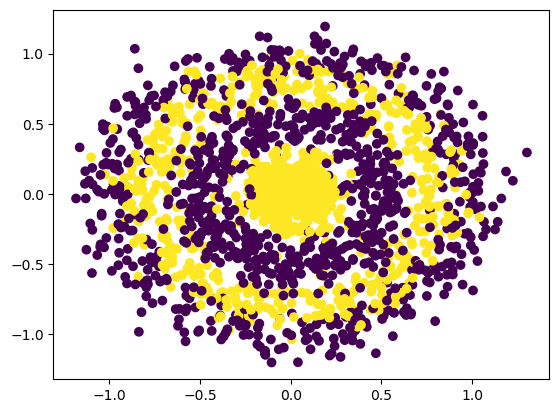

In [3]:
# make a data set
# X = (x,y) coordinates; y = class
X1, y1 = make_circles(n_samples=1000, noise=0.1, factor=0.8)
X2, y2 = make_circles(n_samples=1000, noise=0.2, factor=0.2)
X = np.vstack((X1,X2/2))
y = np.hstack((y1,y2))

# Splitting in train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
plt.scatter(x=X[:,0], y=X[:,1], c=y);

In [4]:
# try a random forest
mlflow.start_run(run_name="RFC")
mlflow.autolog()
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=10, n_estimators=1000,verbose=1)
rfc.fit(X_train, y_train)
mlflow.end_run()

2023/07/06 09:17:08 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

mlflow.start_run(run_name="ABC")
mlflow.autolog()

abc = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4),n_estimators=100)
abc.fit(X_train, y_train)

mlflow.end_run()

2023/07/06 09:18:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [8]:
from sklearn.ensemble import GradientBoostingClassifier

mlflow.start_run(run_name="GRAD")
mlflow.autolog()

gbc = GradientBoostingClassifier(n_estimators=400,verbose=1)
gbc.fit(X_train, y_train)

mlflow.end_run()

2023/07/06 09:18:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


      Iter       Train Loss   Remaining Time 
         1           1.3324            0.99s
         2           1.2868            0.86s
         3           1.2579            0.84s
         4           1.2221            0.82s
         5           1.1906            0.82s
         6           1.1701            0.80s
         7           1.1502            0.80s
         8           1.1255            0.82s
         9           1.1102            0.81s
        10           1.0963            0.80s
        20           0.9908            0.71s
        30           0.9080            0.67s
        40           0.8417            0.64s
        50           0.7939            0.62s
        60           0.7435            0.60s
        70           0.7005            0.58s
        80           0.6728            0.56s
        90           0.6438            0.54s
       100           0.6142            0.52s
       200           0.4213            0.34s
       300           0.3111            0.17s
       40